# Introduction

I am a long time user of ggplot2 to visualize data in R.  Two most often used visuazation were boxplot and facets.

https://www.transtats.bts.gov/Data_Elements.aspx?Data=2


Python other tools to visualize.  This was inspired by https://ritza.co/articles/matplotlib-vs-seaborn-vs-plotly-vs-MATLAB-vs-ggplot2-vs-pandas/

# Extract, Transform, Load (ETL)

Raw data has `,` for every thousand.  Remove it during the data load.
Remove the `TOTAL` row



In [ ]:
!pin install pandas
!pip install matplotlib
!pip install plotnine
!pip install seaborn
!pip install plotly
!pip install altair

In [1]:
import pandas as pd

# raw data has , for every thousand
flights = pd.read_csv('https://raw.githubusercontent.com/robert-s-lee/flight-passenger-plot/master/data/Passengers_8_21_2022_9_36_03_AM.csv',thousands=',')
# remove total for the year row
flights = flights[flights.Month != 'TOTAL']
# change Month column to int type
flights['Month'] = flights['Month'].astype('int')


# matplotlib

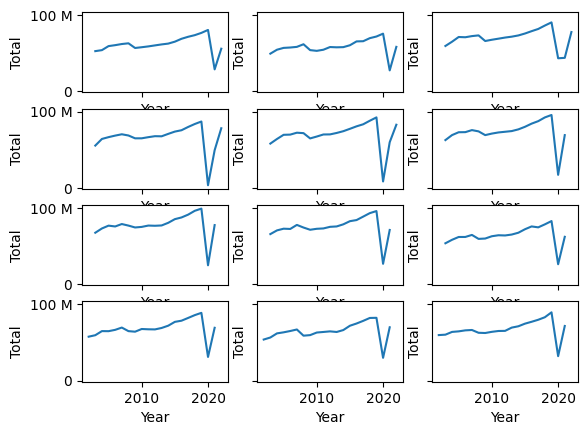

In [193]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# axs = numpy
fig,axs = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True)
month=1
for ax in axs.flatten():
	ax.set_xlabel('Year')
	ax.set_ylabel('Total')
	ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
	ax.yaxis.set_major_formatter(ticker.EngFormatter())
	df = flights[flights.Month == month]
	ax.plot(df['Year'], df['TOTAL'])
	month += 1


# ggplot

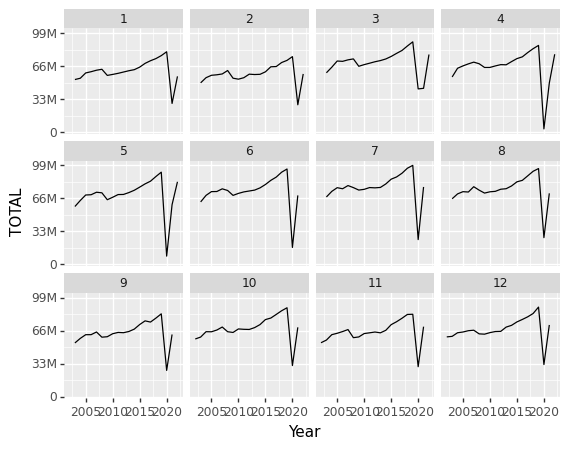

<ggplot: (8787517388036)>

In [133]:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_y_continuous.html
from plotnine import ggplot, geom_line, geom_line, aes, stat_smooth, facet_wrap, scale_y_continuous
import numpy as np

def human_readable_size(size, decimal_places=0):
	if size < 0:
		size = -size
		sign = "-"
	else:
		sign=""
	for unit in ['','K','M','G','T']:
		if size < 1000.0:
			break
		size /= 1000.0
	return f"{sign}{size:.{decimal_places}f}{unit}"

totals_max = max(flights.TOTAL)
ticks = [ x for x in np.linspace(start=0, stop=totals_max, num=4)]
ylabels = [ticker.EngFormatter().format_eng(y) for y in ticks]
g = ggplot(flights, aes('Year', 'TOTAL')) + geom_line() + facet_wrap('~Month') + scale_y_continuous(breaks = ticks, labels = ylabels)
g

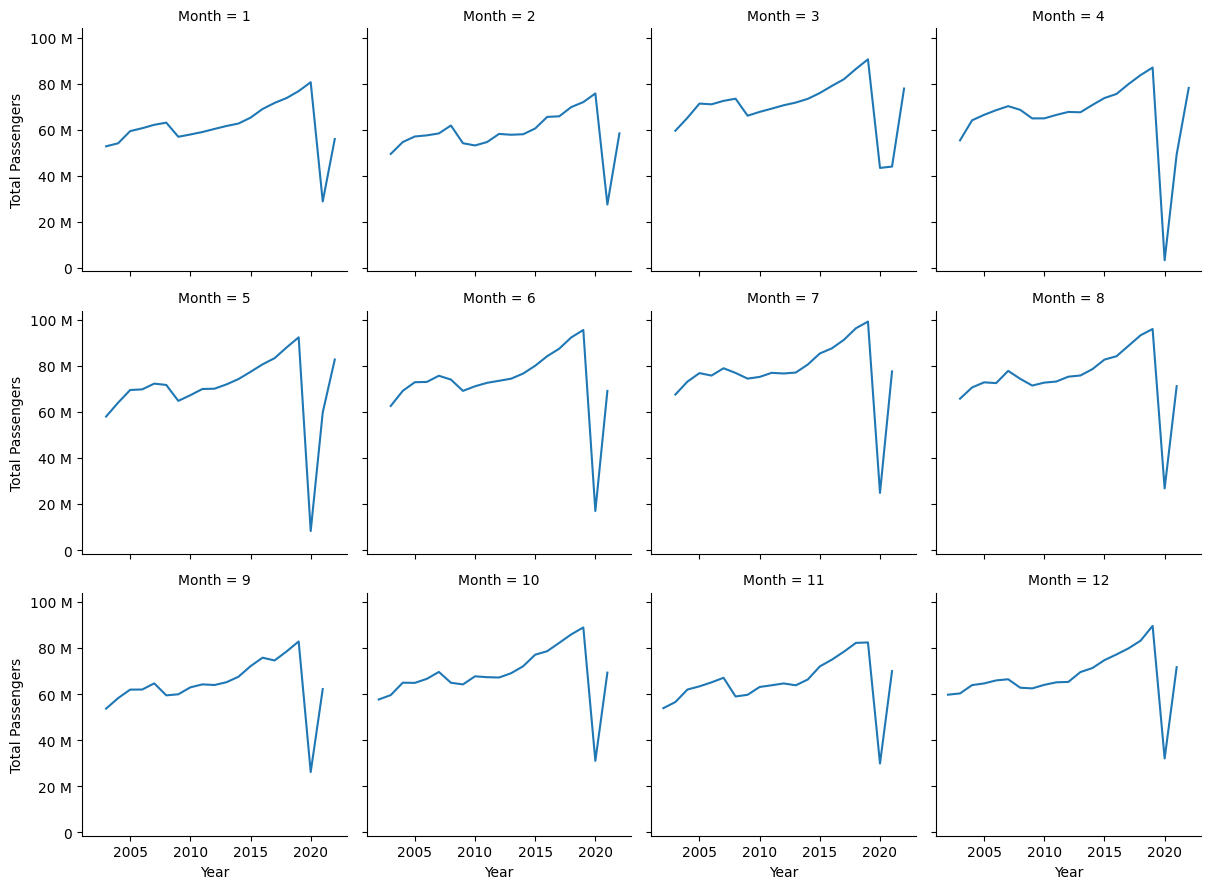

In [210]:
import seaborn as sns
import matplotlib.ticker as ticker

g = sns.FacetGrid(flights, col="Month", col_wrap=4)
g = g.map_dataframe(sns.lineplot,x="Year", y="TOTAL")
g = g.set( xlabel = "Year", ylabel = "Total Passengers")
g = g.axes[0].yaxis.set_major_formatter(ticker.EngFormatter())


In [135]:
import plotly.express as px
fig = px.line(flights, x="Year", y="TOTAL", facet_col="Month", facet_col_wrap=4)
fig.show()

In [153]:
import altair as alt
# :Q https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types
# ~s Number format https://github.com/d3/d3-format#locale_format
p = (alt.Chart(flights)
		.mark_line()
    .encode(
        alt.X("Year:Q",scale=alt.Scale(zero=False)),
        alt.Y("TOTAL", axis=alt.Axis(format='~s')),
				facet=alt.Facet('Month', columns=4),
    )
    .interactive()
)
p

alt.Chart(...)